In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import warnings
warnings.filterwarnings("ignore")


nfl=pd.read_csv('NFLPlaybyPlay2015.csv')
nfl[:5]

,Unnamed: 0,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Season
0,36,2015-09-10,2015091000,1,1,NaN,15:00,15,3600.0,0.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
1,51,2015-09-10,2015091000,1,1,1.0,15:00,15,3600.0,0.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
2,72,2015-09-10,2015091000,1,1,1.0,14:21,15,3561.0,39.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
3,101,2015-09-10,2015091000,1,1,2.0,14:04,15,3544.0,17.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
4,122,2015-09-10,2015091000,1,1,1.0,13:26,14,3506.0,38.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

df=nfl.copy()

#Extra Point
df['ExPointAborted'] = pd.get_dummies(df['ExPointResult'])["Aborted"]
df['ExPointMade']= pd.get_dummies(df['ExPointResult'])["Made"]
df['ExPointMissed']= pd.get_dummies(df['ExPointResult'])["Missed"]

#Two Point Conv
df['TwoPointSuc']= pd.get_dummies(df['TwoPointConv'])["Success"]
df['TwoPointFail']= pd.get_dummies(df['TwoPointConv'])["Failure"]

#Defense Two Point
df['DefTwoPointSuc']= pd.get_dummies(df['DefTwoPoint'])["Success"]
df['DefTwoPointFail']= pd.get_dummies(df['DefTwoPoint'])["Failure"]

# Punt Result
df['PuntResultClean']= pd.get_dummies(df['PuntResult'])["Clean"]
df['PuntResultBlocked']= pd.get_dummies(df['PuntResult'])["Blocked"]

#Play Type
df['KickoffPlay']= pd.get_dummies(df['PlayType'])["Kickoff"]
df['RunPlay']= pd.get_dummies(df['PlayType'])["Run"]
df['PassPlay']= pd.get_dummies(df['PlayType'])["Pass"]
df['SackPlay']= pd.get_dummies(df['PlayType'])["Sack"]
df['NoPlay']= pd.get_dummies(df['PlayType'])["No Play"]
df['FieldGoalPlay']= pd.get_dummies(df['PlayType'])["Field Goal"]
df['PuntPlay']= pd.get_dummies(df['PlayType'])["Punt"]
df['ExtraPointPlay']= pd.get_dummies(df['PlayType'])["Extra Point"]
df['QBKneelPlay']= pd.get_dummies(df['PlayType'])["QB Kneel"]
df['SpikePlay']= pd.get_dummies(df['PlayType'])["Spike"]
df['OnsideKickPlay']= pd.get_dummies(df['PlayType'])["Onside Kick"]

#Pass Outcome
df['CompletedPass']= pd.get_dummies(df['PassOutcome'])["Complete"]
df['IncompletePass']= pd.get_dummies(df['PassOutcome'])["Incomplete Pass"]

#Side of Field
df["OffenseSide"] = (df["SideofField"] == df["posteam"])

#Pass Length
df["ShortPass"] = pd.get_dummies(df['PassLength'])["Short"]
df["DeepPass"] = pd.get_dummies(df['PassLength'])["Deep"]

#Pass Location
df["LeftPass"]= pd.get_dummies(df['PassLocation'])["left"]
df["MiddlePass"]= pd.get_dummies(df['PassLocation'])["middle"]
df["RightPass"]= pd.get_dummies(df['PassLocation'])["right"]

#Run Location
df["LeftRun"]= pd.get_dummies(df['RunLocation'])["left"]
df["MiddleRun"]= pd.get_dummies(df['RunLocation'])["middle"]
df["RightRun"]= pd.get_dummies(df['RunLocation'])["right"]

#Run Gap
df["RunGapEnd"]= pd.get_dummies(df['RunGap'])["end"]
df["RunGapGuard"]= pd.get_dummies(df['RunGap'])["guard"]
df["RunGapTackle"]= pd.get_dummies(df['RunGap'])["tackle"]

#Return Result
df["ReturnResultTD"]= pd.get_dummies(df['ReturnResult'])["Touchdown"]
df["ReturnResultTouch"]= pd.get_dummies(df['ReturnResult'])["Touchback"]

#Offense Fumble Recovery
df["OffFumbleRecover"] = (df["RecFumbTeam"] == df["posteam"])

#Challenge Result
df["ChalOverturned"]= pd.get_dummies(df['ChalReplayResult'])["Reversed"]
df["ChalAccept"]= pd.get_dummies(df['ChalReplayResult'])["Upheld"]

#Penalty
df["OffPenalty"] = (df["PenalizedTeam"] == df["posteam"])


nflcluster=df[['Passer','PassAttempt','InterceptionThrown','Yards.Gained','CompletedPass','IncompletePass','ShortPass','DeepPass','RunPlay','PassPlay']]

In [3]:
nflcluster=nflcluster.groupby('Passer').agg(np.sum)
nflcluster[:5]

,PassAttempt,InterceptionThrown,Yards.Gained,CompletedPass,IncompletePass,ShortPass,DeepPass,RunPlay,PassPlay
Passer,,,,,,,,,
A.Andrews,1,0,41,1.0,0.0,0.0,1.0,0.0,1.0
A.Dalton,416,7,3436,265.0,151.0,314.0,100.0,0.0,385.0
A.Davis,103,3,578,60.0,43.0,89.0,14.0,0.0,94.0
A.Luck,306,12,2049,172.0,134.0,232.0,72.0,0.0,293.0
A.McCarron,125,2,889,81.0,44.0,96.0,28.0,0.0,119.0


In [4]:
nflcluster=nflcluster[nflcluster['PassAttempt']>=50]

In [5]:
k=list(range(3,11))
scores=dict.fromkeys(k)

nflcluster=nflcluster.fillna(int(0))

data=scale(nflcluster[['PassAttempt','InterceptionThrown','Yards.Gained']].values)

for size in k:
    kmeans=KMeans(n_clusters=size)
    kmeans.fit(data)
    scores[size]=silhouette_score(data,kmeans.labels_)

In [6]:
sum_of_distances={}
for num_clusters in range(1,10):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(nflcluster)
    sum_of_distances[num_clusters] = kmeans.inertia_
ax = Series(sum_of_distances).sort_index().plot()
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Sum of distances of points to closest cluster centers')
ax.plot()

[]

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


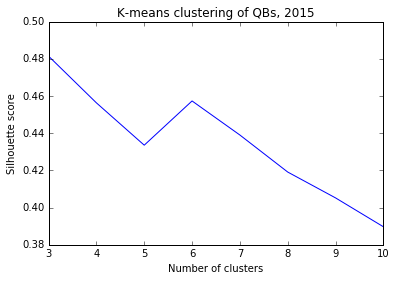

In [7]:
%pylab inline
plt.plot(k,scores.values())

plt.title('K-means clustering of QBs, 2015')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [8]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(data)

clusters=pd.DataFrame(kmeans.cluster_centers_,columns=['PassAttempt','InterceptionThrown','Yards.Gained'])
nflcluster['cluster']=kmeans.labels_

nflcluster[nflcluster.cluster==3]

,PassAttempt,InterceptionThrown,Yards.Gained,CompletedPass,IncompletePass,ShortPass,DeepPass,RunPlay,PassPlay,cluster
Passer,,,,,,,,,,
A.Luck,306,12,2049,172.0,134.0,232.0,72.0,0.0,293.0,3
B.Gabbert,294,7,2125,183.0,111.0,249.0,45.0,0.0,282.0,3
B.Osweiler,287,6,1997,174.0,113.0,237.0,50.0,0.0,275.0,3
C.Kaepernick,254,5,1624,147.0,107.0,207.0,44.0,0.0,246.0,3
J.Manziel,229,5,1506,132.0,97.0,192.0,36.0,0.0,223.0,3
J.McCown,316,5,2210,194.0,122.0,260.0,51.0,0.0,295.0,3
M.Cassel,218,7,1397,124.0,94.0,173.0,42.0,0.0,204.0,3
M.Hasselbeck,273,7,1774,162.0,111.0,226.0,47.0,0.0,256.0,3
N.Foles,355,11,2130,195.0,160.0,280.0,72.0,0.0,336.0,3


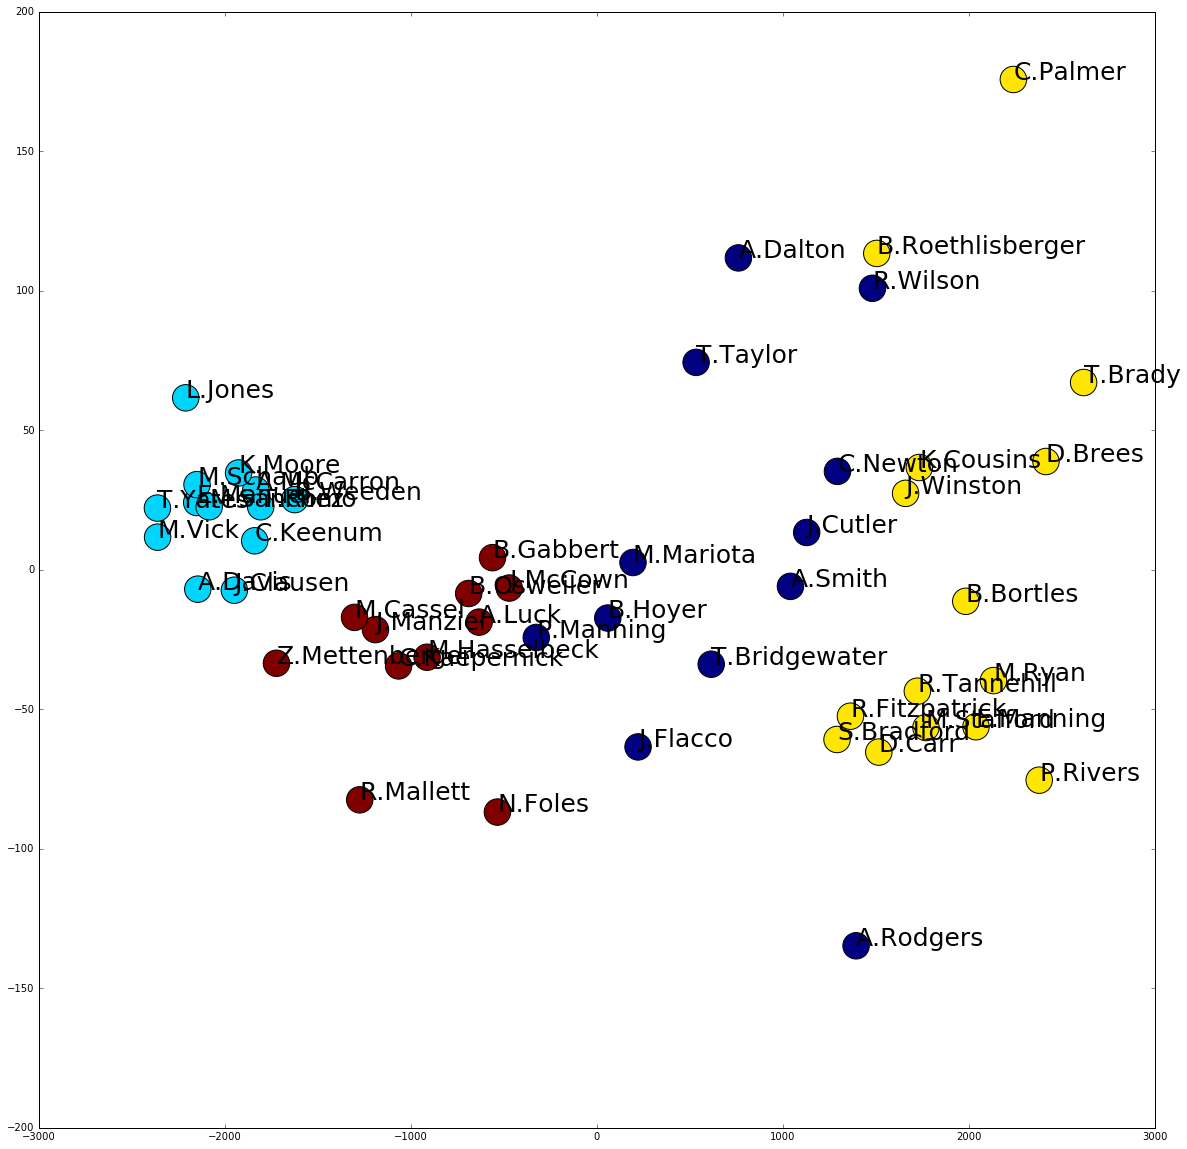

In [9]:
from sklearn.decomposition import PCA

pca2=PCA(2)

x=nflcluster

plot_columns=pca2.fit_transform(x)

plt.figure(figsize=(20,20))
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1],s=700, c=kmeans.labels_)

labels = ['{}'.format(i) for i in nflcluster.index]

for label, x, y in zip(labels, plot_columns[:,0], plot_columns[:,1]):
    plt.annotate(label, xy = (x, y), fontsize=25)

In [10]:
Clusters=pd.DataFrame((pd.Series(pca2.components_[0], index=nflcluster.columns).sort_values()))
Clusters

,0
cluster,-0.000006
RunPlay,-0.000000
InterceptionThrown,0.002478
DeepPass,0.025192
IncompletePass,0.046494
CompletedPass,0.081524
ShortPass,0.101803
PassPlay,0.119704
PassAttempt,0.128019
Yards.Gained,0.974407


In [11]:
nflwin=nfl.copy()

In [12]:
#stat analysis
nfl['FieldGoalResult'].unique()
nfl['FieldGoalResult'][nfl.FieldGoalResult=='No Good']=int(1)
nfl['FieldGoalResult'][nfl.FieldGoalResult=='Good']=int(2)
nfl['FieldGoalResult'][nfl.FieldGoalResult=='Blocked']=int(3)

In [13]:
nfl=nfl.fillna(int(0))

In [14]:
nfl['FieldGoalResult'].unique()

array([0, 1, 2, 3], dtype=int64)

In [15]:
nfl['PuntResult'].unique()

array([0, 'Clean', 'Blocked'], dtype=object)

In [16]:
nfl['PuntResult'][nfl.PuntResult=='Clean']=int(1)
nfl['PuntResult'][nfl.PuntResult=='Blocked']=int(2)

In [17]:
nfl=nfl[nfl['down']==4.0]

In [18]:
nfl=nfl[nfl['FieldGoalResult']==0]

In [19]:
nfl['FieldGoalResult'].unique()

array([0], dtype=int64)

In [20]:
nfl['PuntResult'].sum()

2495

In [21]:
nflp=nfl[nfl['PuntResult']!=0]

In [22]:
nflp['PuntResult'].unique()

array([1, 2], dtype=object)

In [23]:
float(nflp['PuntResult'].sum())/float(len(nfl)) *100

80.84899546338302

In [24]:
nfl['PuntResult'].unique()

array([1, 0, 2], dtype=object)

In [25]:
nfl=nfl[nfl['PuntResult']==0]
nfl[:5]

,Unnamed: 0,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Season
70,1704,2015-09-10,2015091000,7,2,4.0,00:48,1,1848.0,0.0,...,0,0,0,0,0,0.0,14.0,-14.0,14.0,2015
167,3968,2015-09-10,2015091000,18,4,4.0,00:22,1,22.0,5.0,...,0,0,0,0,0,14.0,28.0,-14.0,14.0,2015
228,1305,2015-09-13,2015091300,5,2,4.0,09:29,10,2369.0,5.0,...,0,0,0,0,0,3.0,7.0,-4.0,4.0,2015
306,3152,2015-09-13,2015091300,11,4,4.0,14:31,15,871.0,29.0,...,0,0,0,0,0,17.0,16.0,1.0,1.0,2015
325,3592,2015-09-13,2015091300,12,4,4.0,07:42,8,462.0,6.0,...,0,0,0,0,0,16.0,24.0,-8.0,8.0,2015


In [26]:
len(nfl)

602

In [27]:
nfl['PassOutcome'].unique()

array(['Complete', 0, 'Incomplete Pass'], dtype=object)

In [28]:
nfl[nfl["PassOutcome"] == 'Incomplete Pass']=int(0)
nfl[nfl["PassOutcome"] == 'Complete']=int(1)

In [29]:
nfl['PassOutcome'].sum()/float(602) * 100

28.405315614617937

In [30]:
to=nflwin[['GameID','posteam', 'DefensiveTeam', 'qtr','time','PosTeamScore', 
         'DefTeamScore', 'InterceptionThrown','Fumble', 'RecFumbTeam' ]]

In [31]:
test=to[to['GameID']==2015091000]
test.groupby('GameID').last()

,posteam,DefensiveTeam,qtr,time,PosTeamScore,DefTeamScore,InterceptionThrown,Fumble,RecFumbTeam
GameID,,,,,,,,,
2015091000,NE,PIT,4,00:00,28.0,21.0,0,0,NE


In [32]:
finalq=to[to['qtr']==4]
finalq=finalq[finalq['time']<='00:10']

In [33]:
finalq['Win']=(finalq["PosTeamScore"] >= finalq["DefTeamScore"]).astype(int)
finalq = finalq[np.isfinite(finalq['PosTeamScore'])]
finalq=finalq[finalq['Win']==1]

In [34]:
to["DefFumbleRecover"] = (to["RecFumbTeam"] == to["DefensiveTeam"]).astype(int)
to["OffFumbleRecover"] = (to["RecFumbTeam"] == to["posteam"]).astype(int)

to.head()

,GameID,posteam,DefensiveTeam,qtr,time,PosTeamScore,DefTeamScore,InterceptionThrown,Fumble,RecFumbTeam,DefFumbleRecover,OffFumbleRecover
0,2015091000,PIT,NE,1,15:00,0.0,0.0,0,0,NaN,0,0
1,2015091000,PIT,NE,1,15:00,0.0,0.0,0,0,NaN,0,0
2,2015091000,PIT,NE,1,14:21,0.0,0.0,0,0,NaN,0,0
3,2015091000,PIT,NE,1,14:04,0.0,0.0,0,0,NaN,0,0
4,2015091000,PIT,NE,1,13:26,0.0,0.0,0,0,NaN,0,0


In [35]:
to=to.fillna(0)
to = to[to.posteam != 0]
to.groupby(['posteam','GameID']).sum()

qtr  PosTeamScore  DefTeamScore  InterceptionThrown  \
posteam GameID                                                            
ARI     2015091307  196        1037.0         767.0                   0   
        2015092006  193        2006.0        1183.0                   1   
        2015092710  211        2276.0         350.0                   1   
        2015100410  207         663.0        1084.0                   1   
        2015101108  171        1541.0         474.0                   0   
        2015101802  216         726.0         740.0                   2   
        2015102600  213        1093.0         699.0                   0   
        2015110108  246        1444.0        1453.0                   1   
        2015111511  287        1808.0        1282.0                   1   
        2015112209  213        1146.0        1102.0                   2   
        2015112909  255         767.0         547.0                   0   
        2015120609  244        1203.0         132.0                   0   
        2015121000  199         941.0         742.0                   1   
        2015122001  223        1654.0         821.0                   0   
        2015122710  169        1156.0         208.0                   1   
        2016010314  182         330.0        1763.0                   3   
ATL     2015091400  225        1202.0         747.0                   2   
        2015092004  206         725.0         862.0                   0   
        2015092700  222        1373.0        1995.0                   0   
        2015100402  204        1937.0         273.0                   0   
        2015101103  251         418.0         691.0                   2   
        2015101500  224         620.0        1516.0                   0   
        2015102508  214         337.0         406.0                   2   
        2015110105  244         537.0        1054.0                   2   
        2015110808  205         681.0         940.0                   0   
        2015112202  230        1145.0         725.0                   3   
        2015112901  200         166.0         694.0                   2   
        2015120608  208         588.0         753.0                   1   
        2015121307  195           0.0        2025.0                   2   
        2015122003  226        1103.0         781.0                   1   
...                 ...           ...           ...                 ...   
TEN     2015092709  253        1234.0        1443.0                   2   
        2015101106  194         367.0         231.0                   1   
        2015101806  212         359.0        1565.0                   2   
        2015102508  157         286.0         278.0                   2   
        2015110103  190         279.0         800.0                   1   
        2015110803  246        1452.0        1785.0                   0   
        2015111503  144         413.0         822.0                   1   
        2015111900  231         672.0         639.0                   0   
        2015112907  195         664.0         890.0                   2   
        2015120604  229        1638.0        1412.0                   1   
        2015121301  205         214.0        1680.0                   1   
        2015122005  200         460.0        1521.0                   3   
        2015122703  211          12.0        1654.0                   1   
        2016010305  196        1003.0        1366.0                   1   
WAS     2015091303  214         525.0         464.0                   2   
        2015092005  219        1132.0         338.0                   0   
        2015092400  255         532.0        1679.0                   2   
        2015100405  258         662.0         878.0                   0   
        2015101103  205         558.0         487.0                   2   
        2015101801  196         723.0        1314.0                   2   
        2015102505  224         933.0        

In [36]:
to.head()

uniquegame=[]

for i in to['GameID'].unique():
    data=to[to['GameID']==i]
    newdict={}
    for i in data['posteam'].unique():
        newdict[i]=None
    uniquegame.append(newdict)
uniquegame

[{'NE': None, 'PIT': None},
 {'CHI': None, 'GB': None},
 {'HOU': None, 'KC': None},
 {'CLE': None, 'NYJ': None},
 {'BUF': None, 'IND': None},
 {'MIA': None, 'WAS': None},
 {'CAR': None, 'JAC': None},
 {'SEA': None, 'STL': None},
 {'ARI': None, 'NO': None},
 {'DET': None, 'SD': None},
 {'TB': None, 'TEN': None},
 {'CIN': None, 'OAK': None},
 {'BAL': None, 'DEN': None},
 {'DAL': None, 'NYG': None},
 {'ATL': None, 'PHI': None},
 {'MIN': None, 'SF': None},
 {'DEN': None, 'KC': None},
 {'CAR': None, 'HOU': None},
 {'PIT': None, 'SF': None},
 {'NO': None, 'TB': None},
 {'DET': None, 'MIN': None},
 {'ARI': None, 'CHI': None},
 {'BUF': None, 'NE': None},
 {'CIN': None, 'SD': None},
 {'CLE': None, 'TEN': None},
 {'ATL': None, 'NYG': None},
 {'STL': None, 'WAS': None},
 {'JAC': None, 'MIA': None},
 {'BAL': None, 'OAK': None},
 {'DAL': None, 'PHI': None},
 {'GB': None, 'SEA': None},
 {'IND': None, 'NYJ': None},
 {'NYG': None, 'WAS': None},
 {'ATL': None, 'DAL': None},
 {'IND': None, 'TEN': None},

In [37]:
to2= to[['GameID','posteam', 'qtr','time','PosTeamScore', 
         'DefTeamScore', 'InterceptionThrown','Fumble', 'RecFumbTeam' ]]
to2.head()

,GameID,posteam,qtr,time,PosTeamScore,DefTeamScore,InterceptionThrown,Fumble,RecFumbTeam
0,2015091000,PIT,1,15:00,0.0,0.0,0,0,0
1,2015091000,PIT,1,15:00,0.0,0.0,0,0,0
2,2015091000,PIT,1,14:21,0.0,0.0,0,0,0
3,2015091000,PIT,1,14:04,0.0,0.0,0,0,0
4,2015091000,PIT,1,13:26,0.0,0.0,0,0,0


In [38]:
to2["OffFumbleRecover"] = (to2["RecFumbTeam"] == to2["posteam"]).astype(int)
del to2['RecFumbTeam']
del to2['qtr']
del to2['PosTeamScore']
del to2['DefTeamScore']

In [39]:
sumto2=to2.groupby(['GameID','posteam']).sum()

In [40]:
sumto2['ActFumble'] = np.where(sumto2['OffFumbleRecover']==0, 1, 0)
sumto2['FumbleCount']= sumto2['Fumble'] * sumto2['ActFumble']

In [41]:
sumto2['TotalTurnover']=sumto2['InterceptionThrown'] + sumto2['FumbleCount']

In [42]:
to3=to[['GameID','posteam','DefensiveTeam', 'qtr','time','PosTeamScore', 
         'DefTeamScore', 'InterceptionThrown','Fumble', 'RecFumbTeam' ]]
to4=to3.groupby('GameID').last()
to4["Win"] = (to4["PosTeamScore"] >= to4["DefTeamScore"]).astype(int)

In [43]:
sa=pd.read_csv('pivot.csv')
sa[:5]

,GameID,posteam,InterceptionThrown,Fumble,OffFumbleRecover,ActFumble,FumbleCount,TotalTurnover,Win,Min Turnover,Win.1,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2015091000,NE,0,1,1,0,0,0,1,NE,NE,1.0,NaN,NaN,NaN
1,2015091000,PIT,1,0,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015091300,CHI,1,1,0,1,1,2,0,GB,GB,1.0,NaN,NaN,NaN
3,2015091300,GB,0,0,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2015091301,SEA,1,0,0,1,0,1,0,SEA,STL,0.0,NaN,NaN,NaN


In [44]:
sumto2['win']=sa['Win'].values

In [45]:
sumto2[:5]

InterceptionThrown  Fumble  OffFumbleRecover  ActFumble  \
GameID     posteam                                                            
2015091000 NE                        0       1                 1          0   
           PIT                       1       0                 0          1   
2015091300 CHI                       1       1                 0          1   
           GB                        0       0                 0          1   
2015091301 SEA                       1       0                 0          1   

                    FumbleCount  TotalTurnover  win  
GameID     posteam                                   
2015091000 NE                 0              0    1  
           PIT                0              1    0  
2015091300 CHI                1              2    0  
           GB                 0              0    1  
2015091301 SEA                0              1    0